In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset-by-age-standardized-countries/Diabetes Dataset By Age Standardized Countries.csv


In [2]:
import pandas as pd
data=pd.read_csv("/kaggle/input/diabetes-dataset-by-age-standardized-countries/Diabetes Dataset By Age Standardized Countries.csv")

In [3]:
data.shape

(14000, 7)

In [4]:
data.head()

,Country/Region/World,ISO,Sex,Year,Age-standardised diabetes prevalence,Lower 95% uncertainty interval,Upper 95% uncertainty interval
0,Afghanistan,AFG,Men,1980,0.044712,0.015339,0.094918
1,Afghanistan,AFG,Men,1981,0.046114,0.016883,0.093777
2,Afghanistan,AFG,Men,1982,0.047601,0.018745,0.094018
3,Afghanistan,AFG,Men,1983,0.049173,0.020375,0.093950
4,Afghanistan,AFG,Men,1984,0.050834,0.022269,0.093679


In [5]:
data.dtypes

Country/Region/World                     object
ISO                                      object
Sex                                      object
Year                                      int64
Age-standardised diabetes prevalence    float64
Lower 95% uncertainty interval          float64
Upper 95% uncertainty interval          float64
dtype: object

In [6]:
round(data.isnull().sum()/len(data)*100)

Country/Region/World                    0.0
ISO                                     0.0
Sex                                     0.0
Year                                    0.0
Age-standardised diabetes prevalence    0.0
Lower 95% uncertainty interval          0.0
Upper 95% uncertainty interval          0.0
dtype: float64

In [7]:
data.duplicated().sum()

0

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,14000.0,1997.000000,10.099866,1980.000000,1988.000000,1997.000000,2006.000000,2014.000000
Age-standardised diabetes prevalence,14000.0,0.075125,0.042190,0.010075,0.050328,0.064552,0.085271,0.328625
Lower 95% uncertainty interval,14000.0,0.044986,0.031686,0.001764,0.026392,0.037424,0.052350,0.232951
Upper 95% uncertainty interval,14000.0,0.115953,0.054215,0.029001,0.082562,0.102309,0.131149,0.465821


In [9]:
categorical_data=data[['Country/Region/World','ISO','Sex']]

In [10]:
for colum in categorical_data:
    print("***********")
    print("the unique columns in the",colum,"is: ")
    print(data[colum].value_counts(normalize=True))
    print(" ")

***********
the unique columns in the Country/Region/World is: 
Afghanistan    0.005
Panama         0.005
Nicaragua      0.005
Niger          0.005
Nigeria        0.005
               ...  
Ghana          0.005
Greece         0.005
Greenland      0.005
Grenada        0.005
Zimbabwe       0.005
Name: Country/Region/World, Length: 200, dtype: float64
 
***********
the unique columns in the ISO is: 
AFG    0.005
PAN    0.005
NIC    0.005
NER    0.005
NGA    0.005
       ...  
GHA    0.005
GRC    0.005
GRL    0.005
GRD    0.005
ZWE    0.005
Name: ISO, Length: 200, dtype: float64
 
***********
the unique columns in the Sex is: 
Men      0.5
Women    0.5
Name: Sex, dtype: float64
 


In [11]:
import matplotlib.pyplot as plt
def plot_line_chart_by_year(df, year, column):
    
    # Group the mean data by year
    mean_by_year = df.groupby(year)[column].mean()

    # Style
    plt.style.use('dark_background')
    plt.figure(figsize=(10, 6))

    # Plot the line chart
    plt.plot(mean_by_year.index, mean_by_year.values, color='limegreen', linewidth=2)

    # Set up other visual elements
    plt.xlabel(year, fontsize = 14, color = 'white')
    plt.ylabel(column, fontsize = 14, color = 'white')
    plt.title(f'{column} by Year', fontsize = 16, color = 'white')
     #Set the colors of ticks and textsb
    plt.tick_params(colors = 'white')
    plt.xticks(fontsize = 12, color = 'white')
    plt.yticks(fontsize = 12, color = 'white')
    
    plt.show()

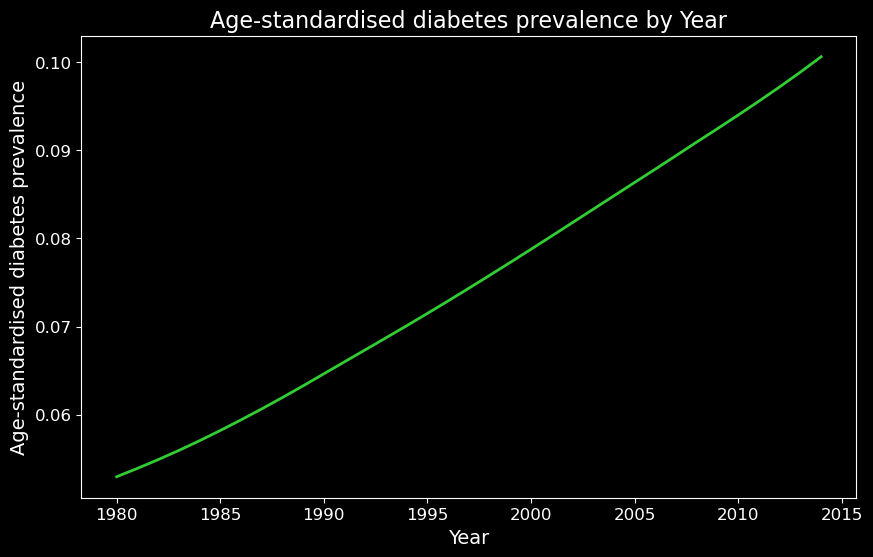

In [12]:
plot_line_chart_by_year(data, 'Year', 'Age-standardised diabetes prevalence')

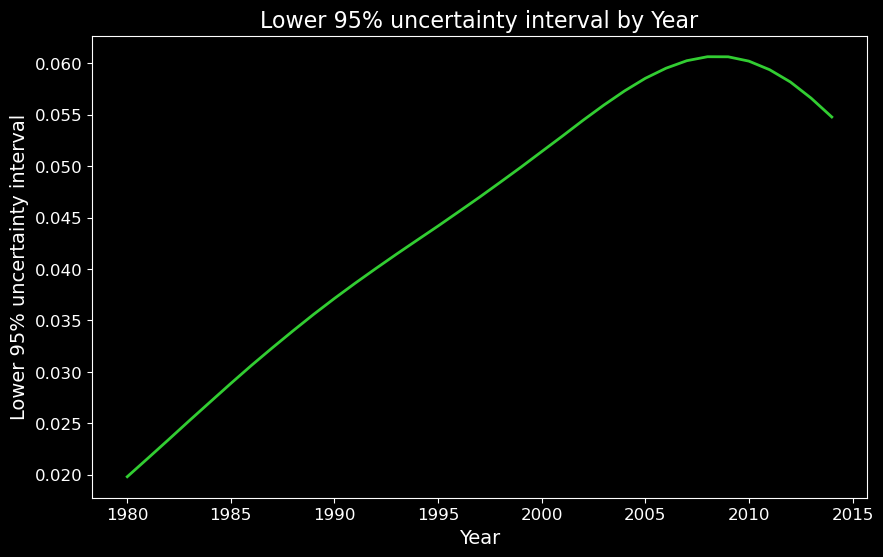

In [13]:
plot_line_chart_by_year(data, 'Year', 'Lower 95% uncertainty interval')

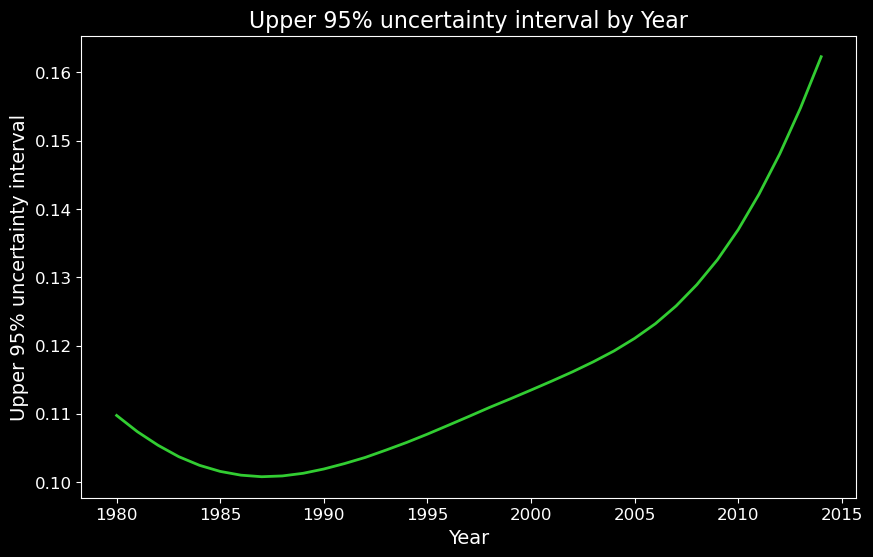

In [14]:
plot_line_chart_by_year(data, 'Year', 'Upper 95% uncertainty interval')

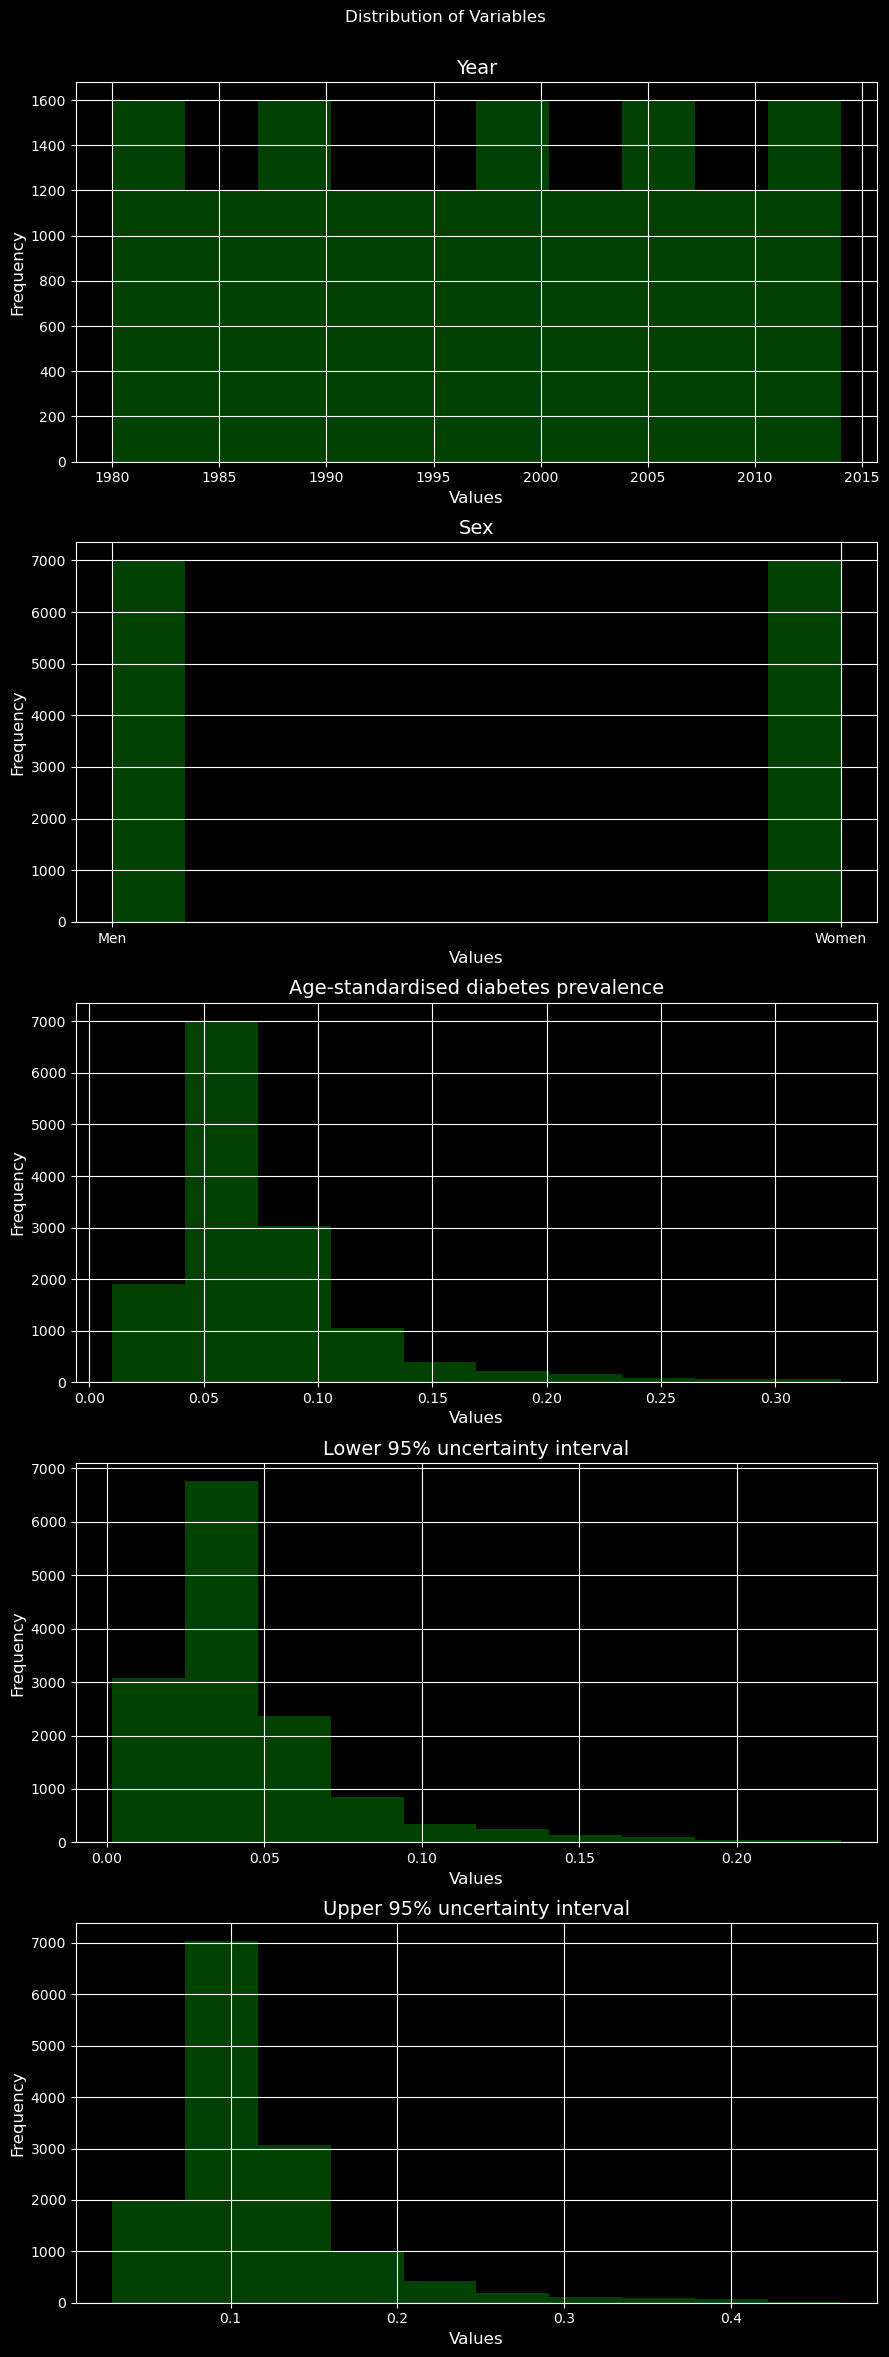

In [15]:
list_columns = ['Year', 'Sex', 'Age-standardised diabetes prevalence',
                'Lower 95% uncertainty interval', 'Upper 95% uncertainty interval']

fig, axs = plt.subplots(5, 1, figsize = (9, 24), facecolor = 'black')
fig.suptitle('Distribution of Variables', color = 'white')

# Loop through the columns and create histograms
for i, column in enumerate(list_columns):
    ax = axs.flat[i]
    ax.hist(data[column], color = 'green', alpha = 0.5)
    ax.set_title(column, fontsize = 14, color = 'white')
    ax.set_xlabel('Values', fontsize = 12, color = 'white')
    ax.set_ylabel('Frequency', fontsize = 12, color = 'white')
    ax.grid(True)
    ax.tick_params(colors='white')
    ax.set_facecolor('black')
    plt.tight_layout()
plt.subplots_adjust(top = 0.95)

plt.show()

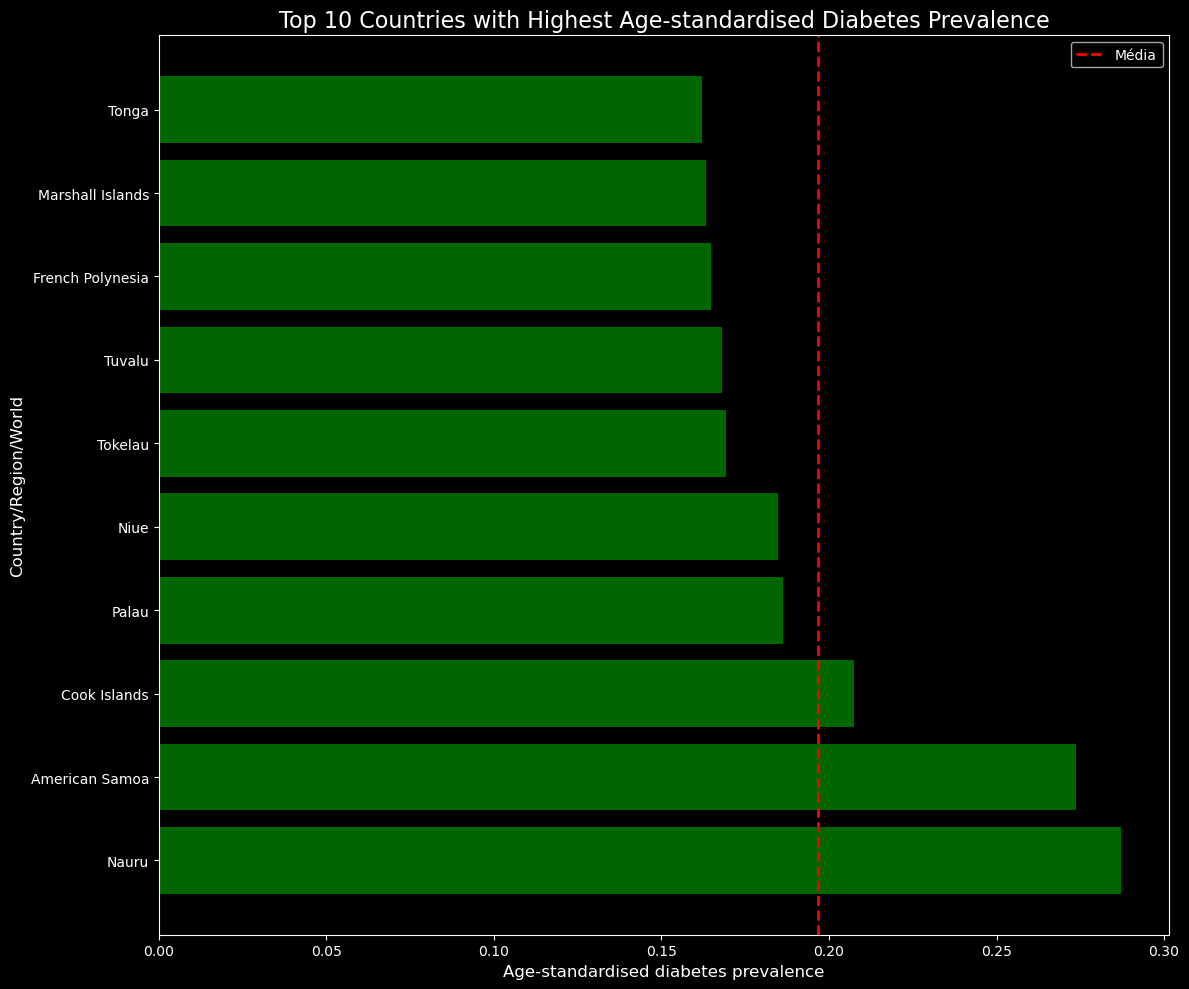

In [16]:
media_prevalence = data.groupby('Country/Region/World')['Age-standardised diabetes prevalence'].mean()
media_prevalence = media_prevalence.sort_values(ascending=False).head(10)

plt.figure(figsize = (12, 10))
plt.barh(media_prevalence.index, media_prevalence.values, color = 'green', alpha = 0.8)
plt.axvline(media_prevalence.mean(), color = 'red', linestyle = 'dashed', linewidth = 2, label = 'Média')
plt.xlabel('Age-standardised diabetes prevalence', fontsize = 12)
plt.ylabel('Country/Region/World', fontsize = 12) 
plt.title('Top 10 Countries with Highest Age-standardised Diabetes Prevalence', fontsize = 16)
plt.legend()
plt.tight_layout()
plt.show()

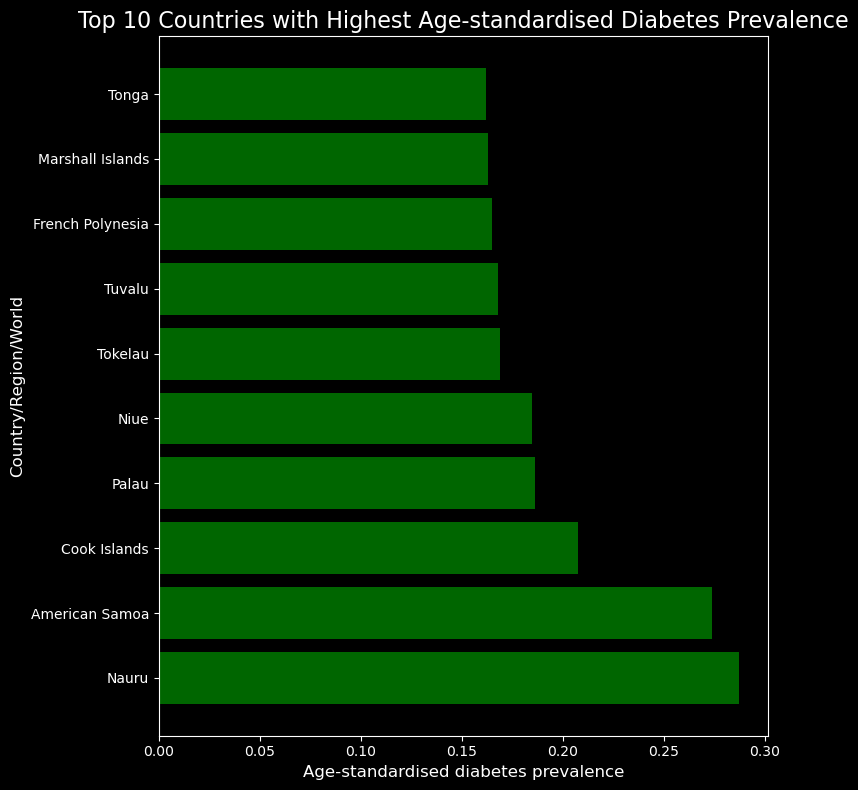

In [17]:

media_prevalence = data.groupby('Country/Region/World')['Age-standardised diabetes prevalence'].mean()
media_prevalence = media_prevalence.sort_values(ascending=False).head(10)
plt.figure(figsize = (8, 8))
plt.barh(media_prevalence.index, media_prevalence.values, color = 'green', alpha = 0.8)
plt.xlabel('Age-standardised diabetes prevalence', fontsize = 12)
plt.ylabel('Country/Region/World', fontsize = 12) 
plt.title('Top 10 Countries with Highest Age-standardised Diabetes Prevalence', fontsize = 16)
plt.tight_layout()



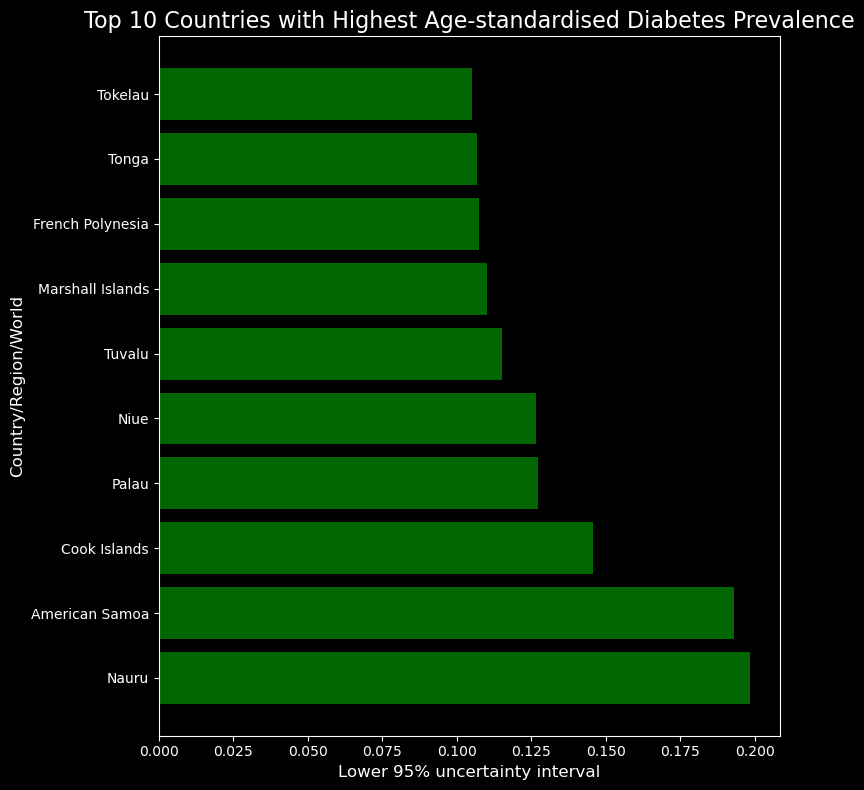

In [18]:
media_prevalence = data.groupby('Country/Region/World')['Lower 95% uncertainty interval'].mean()
media_prevalence = media_prevalence.sort_values(ascending=False).head(10)
plt.figure(figsize = (8, 8))
plt.barh(media_prevalence.index, media_prevalence.values, color = 'green', alpha = 0.8)
plt.xlabel('Lower 95% uncertainty interval', fontsize = 12)
plt.ylabel('Country/Region/World', fontsize = 12) 
plt.title('Top 10 Countries with Highest Age-standardised Diabetes Prevalence', fontsize = 16)
plt.tight_layout()


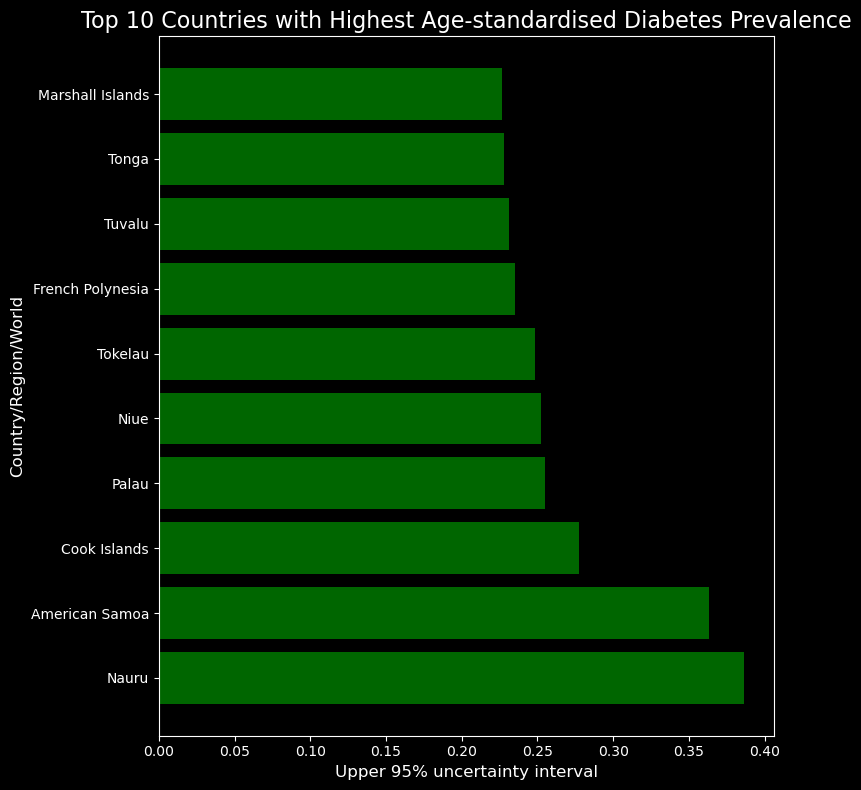

In [19]:
media_prevalence = data.groupby('Country/Region/World')['Upper 95% uncertainty interval'].mean()
media_prevalence = media_prevalence.sort_values(ascending=False).head(10)
plt.figure(figsize = (8, 8))
plt.barh(media_prevalence.index, media_prevalence.values, color = 'green', alpha = 0.8)
plt.xlabel('Upper 95% uncertainty interval', fontsize = 12)
plt.ylabel('Country/Region/World', fontsize = 12) 
plt.title('Top 10 Countries with Highest Age-standardised Diabetes Prevalence', fontsize = 16)
plt.tight_layout()

In [20]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = pd.Categorical(data[col])
        data[col] = data[col].cat.codes

In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Country/Region/World,14000.0,99.500000,57.736367,0.000000,49.750000,99.500000,149.250000,199.000000
ISO,14000.0,99.500000,57.736367,0.000000,49.750000,99.500000,149.250000,199.000000
Sex,14000.0,0.500000,0.500018,0.000000,0.000000,0.500000,1.000000,1.000000
Year,14000.0,1997.000000,10.099866,1980.000000,1988.000000,1997.000000,2006.000000,2014.000000
Age-standardised diabetes prevalence,14000.0,0.075125,0.042190,0.010075,0.050328,0.064552,0.085271,0.328625
Lower 95% uncertainty interval,14000.0,0.044986,0.031686,0.001764,0.026392,0.037424,0.052350,0.232951
Upper 95% uncertainty interval,14000.0,0.115953,0.054215,0.029001,0.082562,0.102309,0.131149,0.465821


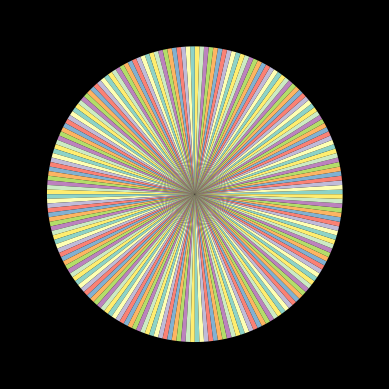

In [22]:
piechart=data.groupby(data['ISO'])['Sex'].count().reset_index()
plt.pie(piechart['Sex']);

<AxesSubplot:>

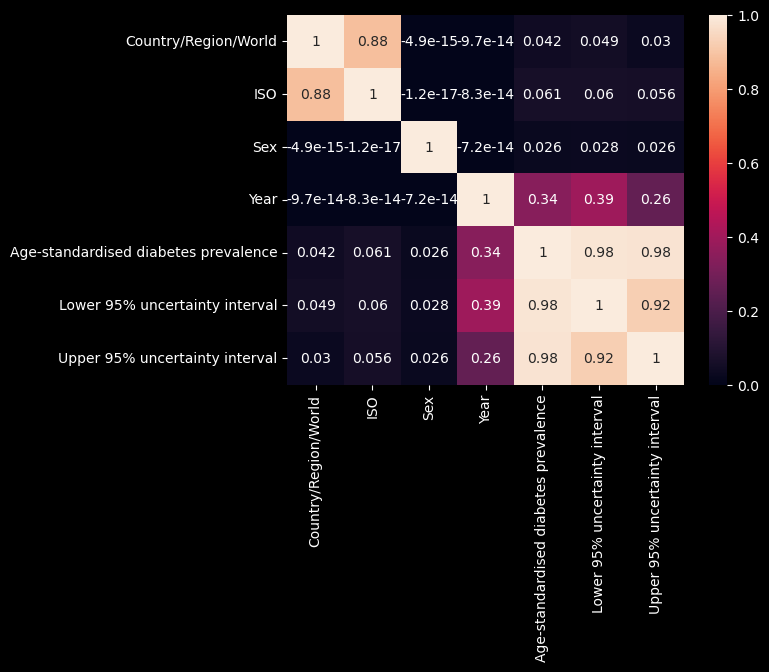

In [23]:
import seaborn as sb
sb.heatmap(data.corr(), annot = True)


In [24]:
data.head()
data.drop(columns=['ISO'],inplace=True)

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [26]:
data.drop(columns=['Upper 95% uncertainty interval'],inplace=True)

In [27]:
y = data['Age-standardised diabetes prevalence']
x= data.drop(['Age-standardised diabetes prevalence'], axis = 1)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=0)

In [29]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=5,random_state=40)
model = RandomForestRegressor(n_estimators=5 , random_state=40)
model.fit(x_train,y_train)
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.9973118332931578
0.9881436080427598
